# Shubh Jhawar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


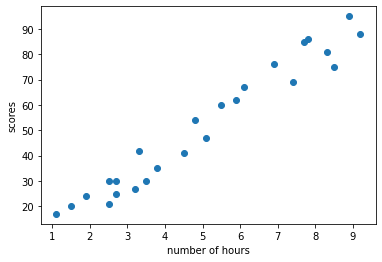

In [6]:
plt.scatter(df["Hours"], df['Scores'])
plt.xlabel("number of hours")
plt.ylabel("scores")
plt.show()

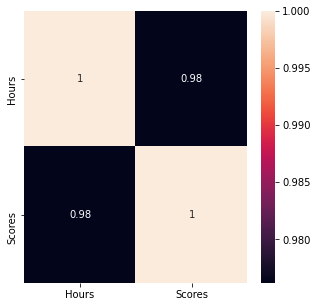

In [7]:
corrmat=df.corr()
top_corr_feat=corrmat.index
plt.figure(figsize=(5,5))
s=sns.heatmap(df[top_corr_feat].corr(), annot=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df[['Hours']]
Y=df['Scores']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1, random_state=2)
print("training data:",X_train.shape)
print("testing data:",X_test.shape)

training data: (22, 1)
testing data: (3, 1)


In [11]:
from sklearn.linear_model import LinearRegression
line=LinearRegression()
line.fit(X_train,y_train)

LinearRegression()

In [12]:
print("coefficent:",line.coef_)
print("intercept:",line.intercept_)

coefficent: [9.85520355]
intercept: 2.0157552143729447


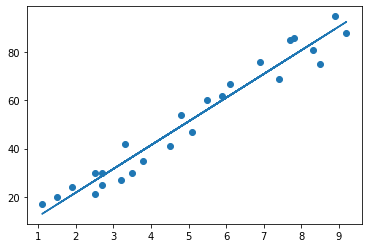

In [13]:
plot_line=line.coef_*X+line.intercept_
plt.plot(X,plot_line)
plt.scatter(df['Hours'], df['Scores'])
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
yhat=line.predict(X_test)
yhat[0:5]

array([12.85647912, 26.65376409, 20.74064196])

In [16]:
print("Mean squared error:",mean_squared_error(y_test,yhat))

Mean squared error: 19.919076167708404


In [17]:
hours=[[9.5]]
res=line.predict(hours)
print("Hours:", hours)
print("Predict Score:",res)

Hours: [[9.5]]
Predict Score: [95.64018894]


In [23]:
import pickle
pickle_out = open("h_m.pkl","wb")
pickle.dump(line, pickle_out)
pickle_out.close()